In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Downloads/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


cabin column has no information, thus dropping it

In [2]:
df = df.drop('Cabin', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Understanding the different columns and their relationships

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


(891, 11)

Shows overall good variability and distribution of data. 

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


finding null values. Replacing or removing if any. Insights, almost 86 null values in age which is a large number, in a
dataset including 418 rows, could cost a lot of great insight so filling it with the mean values.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Used median to get the exact middle age, or the people from the most common and famous age groups
reassigned as i don't want to make changes on the real memory 


In [3]:
df_clean = df.copy()
median_age = df_clean['Age'].median()
df_clean['Age'] = df_clean['Age'].fillna(median_age)
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Dropping one row of column Fare with one null value, as it is less that 0.1% of the dataset, no change on the insights

In [4]:
df_clean = df_clean.dropna(subset = ["Embarked"])
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Here we see that most people of Pclass 1 survive, that indicates the priority was given to the first class people

In [5]:
survived_grouped = df_clean.groupby("Pclass")["Survived"].sum()
survived_grouped

Pclass
1    134
2     87
3    119
Name: Survived, dtype: int64

In [6]:
total = df_clean["Pclass"].value_counts()

In [7]:
percent_pclass = survived_grouped / total * 100
percent_pclass

Pclass
1    62.616822
2    47.282609
3    24.236253
dtype: float64

The plot shows survival percentage of people of different Pclass
Insights : More richer or more higher the class, more chances of survival
IT can help the model understand the class and human relationship better

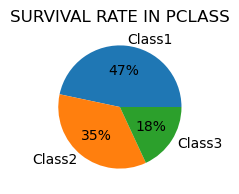

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (4,2))
labels = ["Class1", "Class2", "Class3"]
plt.pie(data = df_clean, labels = labels,x = percent_pclass, autopct='%.0f%%')
plt.title("SURVIVAL RATE IN PCLASS")
plt.show()

In [13]:
df_clean["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Shows the age distribution and variability in titanic
Insights: Most individuals were more young, between age of 20-35
Helps the model to understand age distribution better

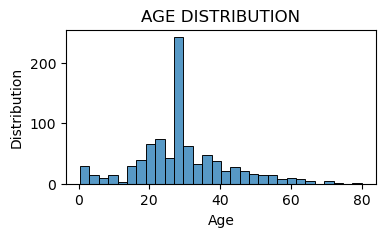

In [14]:
plt.figure(figsize = (4,2))
sns.histplot(x = "Age", data = df_clean)
plt.ylabel("Distribution")
plt.title("AGE DISTRIBUTION")
plt.show()

IT shows the Fare distribution amidst different Pclass
Insight: Higher the fare, lower the people
Helps model predict population and riches of people

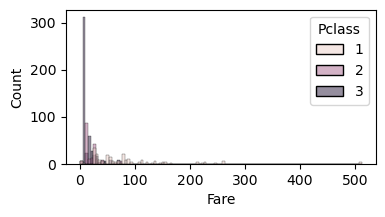

In [15]:
plt.figure(figsize = (4,2))
sns.histplot(x = "Fare", data = df_clean, hue = "Pclass")
plt.show()

The plot shows survival on sex
Insights: Females survived more than mens. It shows maybe women were given more priority
It helps model to understand about the gender differences.

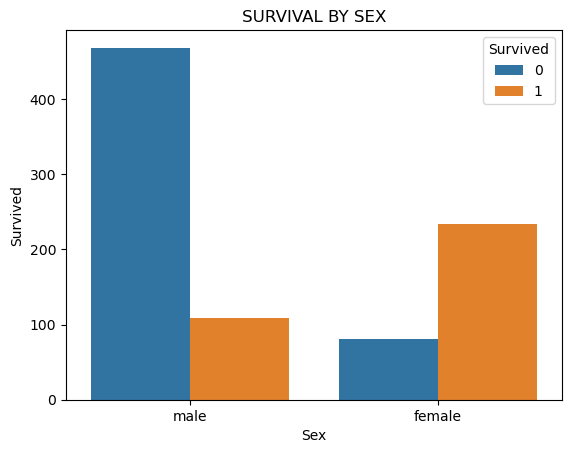

In [16]:
sns.countplot(x = "Sex", hue = "Survived", data = df_clean)
plt.ylabel("Survived")
plt.title("SURVIVAL BY SEX")
plt.show()

This plot shows age groups that survived
Insights: Childrens and old people were the ones that were survived the most
HElps model understand how age difference works in survival

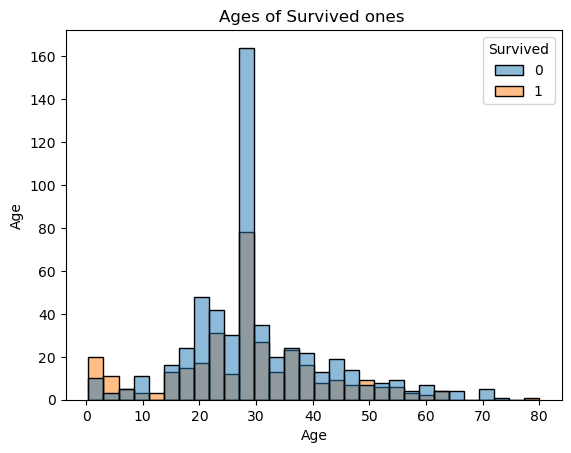

In [91]:
sns.histplot(x = "Age", hue = "Survived", data = df_clean)
plt.ylabel("Age")
plt.title("Ages of Survived ones ")
plt.show()

Embarked distribution, total survival
Insights: The people in C survived the most
Helping model understand various levels, where most people survived

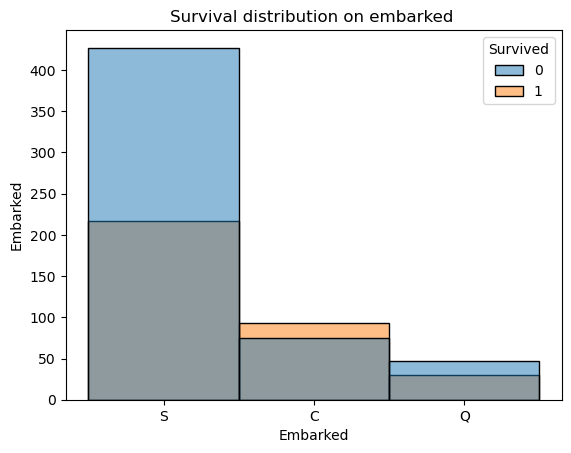

In [92]:
sns.histplot(x = "Embarked", hue = "Survived", data = df_clean)
plt.ylabel("Embarked")
plt.title("Survival distribution on embarked ")
plt.show()

In [9]:
df_clean["Family_Size"] = df_clean["SibSp"] + df_clean["Parch"] + 1
df_clean["Family_Size"].head()

0    2
1    2
2    1
3    2
4    1
Name: Family_Size, dtype: int64

This plot shows how survival is affected by different family sizes
Insights: Family size of 4 or less than that had the higher chances of survival
Helps model understand the best family size

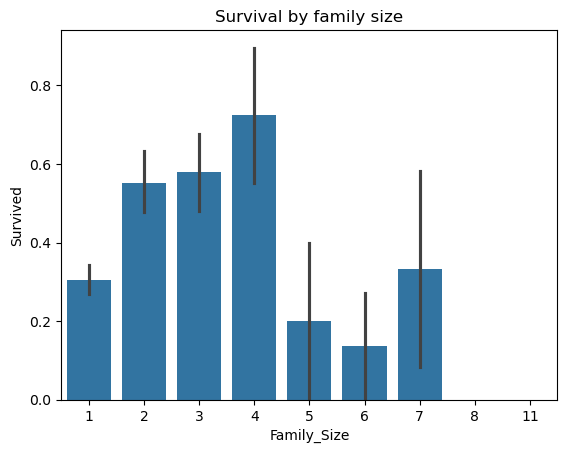

In [104]:
sns.barplot(x="Family_Size", y = "Survived", data = df_clean)
plt.title("Survival by family size")
plt.show()

Removing not required columns

In [10]:
df_clean = df_clean.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [11]:
df_clean = pd.get_dummies(df_clean, columns = ['Sex', 'Embarked'])
df_clean

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,2,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,1,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,2,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,1,True,False,False,False,True
888,0,3,28.0,1,2,23.4500,4,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,1,False,True,True,False,False


In [12]:
df_clean['Sex_female'] = df_clean['Sex_female'].astype(int)
df_clean['Sex_male'] = df_clean['Sex_male'].astype(int)
df_clean['Embarked_C'] = df_clean['Embarked_C'].astype(int)
df_clean['Embarked_Q'] = df_clean['Embarked_Q'].astype(int)
df_clean['Embarked_S'] = df_clean['Embarked_S'].astype(int)
df_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,2,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


WE used correlation method to know which columns are related the most
Insight:Survived has a good +ve relation with fare and female sex, Sibsp and parch have good positive relation with family size
Telling a story that people who were from higher pclass, who paid high fare survived more, also the sex =  female have also had a good chance of survival

In [13]:
correlation = df_clean.corr()

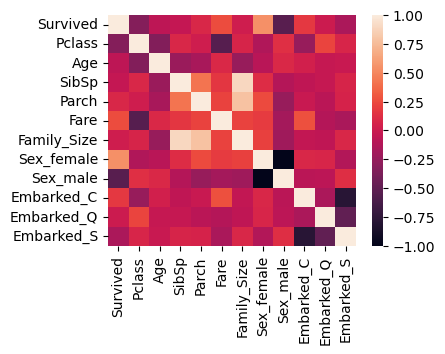

In [15]:
plt.figure(figsize = (4,3))
sns.heatmap(correlation)
plt.show()

Using train_test_split to make the data ready for using different ml models and understanding and gaining insights

In [38]:
from sklearn.model_selection import train_test_split
X = df_clean.drop("Survived", axis = 1)
y = df_clean['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    test_size = 0.25,
                                                    shuffle = True)
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
     Pclass   Age  SibSp  Parch     Fare  Family_Size  Sex_female  Sex_male  \
376       3  22.0      0      0   7.2500            1           1         0   
458       2  50.0      0      0  10.5000            1           1         0   
732       2  28.0      0      0   0.0000            1           0         1   
507       1  28.0      0      0  26.5500            1           0         1   
830       3  15.0      1      0  14.4542            2           1         0   

     Embarked_C  Embarked_Q  Embarked_S  
376           0           0           1  
458           0           0           1  
732           0           0           1  
507           0           0           1  
830           1           0           0  

X_test : 
     Pclass   Age  SibSp  Parch      Fare  Family_Size  Sex_female  Sex_male  \
281       3  28.0      0      0    7.8542            1           0         1   
435       1  14.0      1      2  120.0000            4           1         0   
39        3

Used the logistic regression model, as it is the baseline model. It is simple and quite efficient to use and interpret.
The gap is very less that makes it easier, better, most efficient model to use. That means any other model has to show
accuracy more than this to be used. 
It is mostly used because, it is simple and no complex algo is required with that gap

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
linear = LogisticRegression(max_iter = 1000, random_state = 42)
linear.fit(X_train, y_train)

y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train accuracy: ",train_acc)
print("Test accuracy: ",test_acc)

Train accuracy:  0.7972972972972973
Test accuracy:  0.7802690582959642


Here was a drastic gap over 0.22 and overfitting also increased, i.e model is trained perfectly it understands everything
well but not test.

In [22]:
#from sklearn.tree import DecisionTreeClassifier

#decision_model = DecisionTreeClassifier(random_state = 42)
#decision_model.fit(X_train, y_train)

#y_train_pred2 = decision_model.predict(X_train)
#y_test_pred2 = decision_model.predict(X_test)

#train_acc2 = accuracy_score(y_train, y_train_pred2)
#test_acc2 = accuracy_score(y_test, y_test_pred2)

#print("Train accuracy using DecisionTreeClassifier: ",train_acc2)
#print("Test accuracy using DecisionTreeClassifier: ",test_acc2)

Train accuracy using DecisionTreeClassifier:  0.8258258258258259
Test accuracy using DecisionTreeClassifier:  0.8116591928251121 so using the max_depth we can see the gap has reduced to less than 0.2 similar to logistic regression model, overfitting has been completely taken care of. And now this model is very suitable for prediction

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth = 3, random_state = 42)
decision_model.fit(X_train, y_train)

y_train_pred2 = decision_model.predict(X_train)
y_test_pred2 = decision_model.predict(X_test)

train_acc2 = accuracy_score(y_train, y_train_pred2)
test_acc2 = accuracy_score(y_test, y_test_pred2)

print("Train accuracy using DecisionTreeClassifier: ",train_acc2)
print("Test accuracy using DecisionTreeClassifier: ",test_acc2)

Train accuracy using DecisionTreeClassifier:  0.8258258258258259
Test accuracy using DecisionTreeClassifier:  0.8116591928251121


Lastly tried using random forest regressor model for better accuracy, but it had too much gap, strictly leading towards large
overfitting.

Train accuracy:  0.8138138138138138
Test accuracy:  0.8071748878923767  
max depth =3 
for max depth =5 
Train accuracy:  0.8408408408408409
Test accuracy:  0.820627802690583      
and lastly for max_depth = 10 
Train accuracy:  0.9444444444444444
Test accuracy:  0.8071748878923767            
well its quite evident the least gap is with max_depth = 3, with only about 0.00664 gap, while the logistic regression model had a gap of 0.01703, making random forest regressir model our new champion but i think we should try GridSearchCV as lesser the gap better the efficiency

In [17]:
from sklearn.ensemble import RandomForestClassifier

#random_model = RandomForestClassifier(random_state = 42, n_estimators = 100)
random_model = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = 3)
#random_model = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = 5)
#random_model = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = 10)
random_model.fit(X_train, y_train)

y_train_pred3 = random_model.predict(X_train)
y_test_pred3 = random_model.predict(X_test)

train_acc3 = accuracy_score(y_train, y_train_pred3)
test_acc3 = accuracy_score(y_test, y_test_pred3)

print("Train accuracy: ",train_acc3)
print("Test accuracy: ",test_acc3)

Train accuracy:  0.8138138138138138
Test accuracy:  0.8071748878923767


In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [50,100,200],
    'max_depth' : [3,5,10,None],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state = 42),
    param_grid = param_grid,
    cv = 5,#for 5 fold validation
    n_jobs = -1,#All processors will be working
    verbose = 2#for printing scores too
)

grid_search.fit(X_train, y_train)

print("Best parameter: ", grid_search.best_params_)
print("Best cv score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

print("Train accuracy: ", best_model.score(X_train, y_train))
print("Test accuracy: ", best_model.score(X_test, y_test))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameter:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cv score:  0.8528447985635731
Train accuracy:  0.9069069069069069
Test accuracy:  0.7937219730941704


1. Logistic Regression (Baseline):

Train Accuracy: 0.797

Test Accuracy: 0.780

Gap: 0.017
This model already performed very well. It is simple, interpretable, highly efficient, and showed strong generalization.

2. Decision Tree Classifier:

Initial run: Severe overfitting.

After manual tuning (max_depth=3):

Train Accuracy: 0.826

Test Accuracy: 0.812

Gap: 0.014
Although better than before, the gap was still larger than Logistic Regression. Logistic Regression remained the stronger choice.

3. Random Forest Classifier:

Untuned:

Train Accuracy: 0.944

Test Accuracy: 0.807

Clear overfitting.

After manual tuning (max_depth=3):

Train Accuracy: 0.814

Test Accuracy: 0.807

Gap: 0.0066 → Best balance.

GridSearchCV (best params):

Train Accuracy: 0.907

Test Accuracy: 0.794

Gap: 0.113 → More overfitting compared to manual tuning.

Final Decision:
After analyzing all models, Random Forest Classifier (manual tuning, max_depth=3) is the best choice. It achieves the strongest generalization, handles complexity in the data, and outperformed Logistic Regression while keeping overfitting minimal.

In [30]:
df_test = pd.read_csv("Downloads/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


(418, 11)

In [31]:
df_test_clean = df_test.copy()
df_test_clean = df_test_clean.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
df_test_clean.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [32]:
df_test_clean["Family_Size"] = df_test_clean["SibSp"] + df_test_clean["Parch"] + 1

df_test_clean = pd.get_dummies(df_test_clean, columns = ['Sex', 'Embarked'])
df_test_clean['Sex_female'] = df_test_clean['Sex_female'].astype(int)
df_test_clean['Sex_male'] = df_test_clean['Sex_male'].astype(int)
df_test_clean['Embarked_C'] = df_test_clean['Embarked_C'].astype(int)
df_test_clean['Embarked_Q'] = df_test_clean['Embarked_Q'].astype(int)
df_test_clean['Embarked_S'] = df_test_clean['Embarked_S'].astype(int)

df_test_clean.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,2,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,3,1,0,0,0,1


In [33]:
median_age2 = df_test_clean['Age'].median()
df_test_clean['Age'] = df_test_clean['Age'].fillna(median_age2)
df_test_clean.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,2,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,3,1,0,0,0,1


In [39]:
X_test = df_test_clean.drop('PassengerId', axis = 1)
final_predictions = best_model.predict(X_test)

In [24]:
output = pd.DataFrame({
    'PassengerId' : df_test_clean['PassengerId'],
    'Survived' : final_predictions
})

output.to_csv('submission.csv', index = False)

Random Forest = bagging = parallel trees reduce variance.

XGBoost = boosting = sequential trees reduce bias.

In [27]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 6.7 MB/s eta 0:00:09
    --------------------------------------- 1.0/56.8 MB 3.4 MB/s eta 0:00:17
    --------------------------------------- 1.3/56.8 MB 2.3 MB/s eta 0:00:24
   - -------------------------------------- 1.6/56.8 MB 1.7 MB/s eta 0:00:32
   - -------------------------------------- 1.8/56.8 MB 1.8 MB/s eta 0:00:31
   - -------------------------------------- 2.1/56.8 MB 1.7 MB/s eta 0:00:33
   - -------------------------------------- 2.4/56.8 MB 1.5 MB/s eta 0:00:36
   - -------------------------------------- 2.6/56.8 MB 1.5 MB/s eta 0:00:36
   -- ------------------------------------- 2.9/56.8 MB 1.5 MB/s eta 0:00:36
   -- ------------------------------------- 3.1/56.8 MB 1.5 MB/s eta 0:00:37
   -- ------------------------------------- 3.4/56.8 MB 1.4 MB/s eta 0:00:38
   -- ------------------------------------- 3.7/56.8 MB 1.4 MB/s eta 0:00:38
   -- 

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Split only the TRAINING dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, 
                         n_estimators = 200, max_depth = 3, learning_rate = 0.05,
                         subsample = 0.8, colsample_bytree = 0.8, reg_lambda = 1, reg_alpha = 0.1)
xgb_model.fit(X_train, y_train)

print("Train accuracy:", xgb_model.score(X_train, y_train))
print("Validation accuracy:", xgb_model.score(X_val, y_val))


Train accuracy: 0.8832630098452883
Validation accuracy: 0.8314606741573034


C:\Users\sukhw\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:32:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [42]:
y_pred4 = xgb_model.predict(df_test_clean.drop('PassengerId', axis = 1))
output = pd.DataFrame({
    'PassengerId' : df_test_clean['PassengerId'],
    'Survived' : y_pred4
})

output.to_csv('xgb_submission.csv', index = False)